# Статистический анализ использования телефонных тарифов

**Описание проекта**

Работа от лица аналитика компании **«Мегалайн»** — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: _«Смарт»_ и _«Ультра»_. Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018-й год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

Тариф _«Смарт»_
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - Минута разговора — 3 рубля. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
    - Сообщение — 3 рубля.
    - 1 Гб интернет-трафика — 200 рублей.

Тариф _«Ультра»_
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - Минута разговора — 1 рубль;
    - Сообщение — 1 рубль;
    - 1 Гб интернет-трафика: 150 рублей.

**План работы:**
1. [Обзор данных](#section_1),
2. [Предобработка данных](#section_2),
3. [Исследование данных](#section_3),
4. [Проверка гипотез](#section_4),
5. [Итоги исследования](#section_5).

<a id='section_1'></a>
## Обзор данных

Импорт библиотек.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

FIG_SIZE = (13, 5) # размер графиков

Чтение файла `/datasets/calls.csv`, сохранение датафрейма в переменной `calls`.

In [2]:
calls = pd.read_csv('datasets/calls.csv')

Вывод первые 5 строк датафрейма `calls`.

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Вывод основной информацию для датафрейма `calls`.

In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Вывод гистограммы с помощью метода `hist()` для столбца с продолжительностью звонков.

<Axes: >

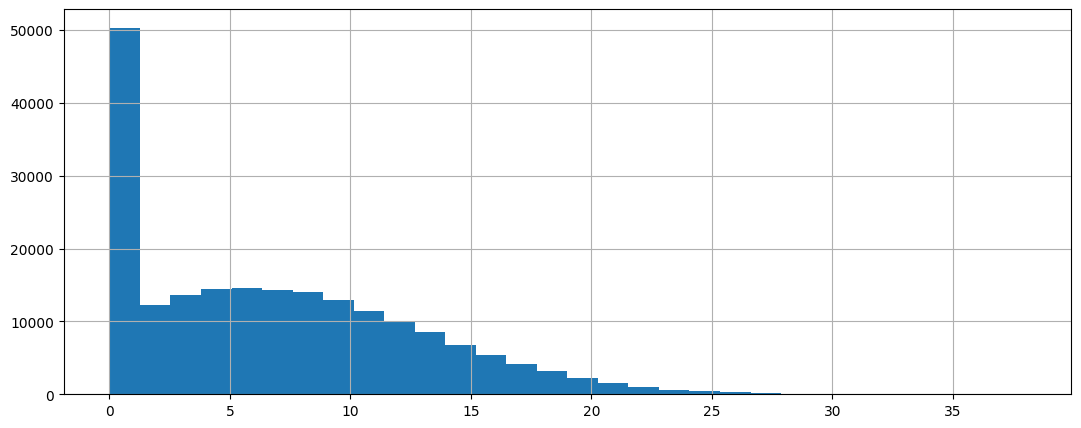

In [5]:
calls['duration'].hist(bins=30, figsize=FIG_SIZE)

Чтение файла `/datasets/internet.csv`, сохранение датафрейм в переменной `sessions`.

In [6]:
sessions = pd.read_csv('datasets/internet.csv')

Вывод первые 5 строк датафрейма `sessions`.

In [7]:
sessions.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Вывод основной информацию для датафрейма `sessions`. 

In [8]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Вывод гистограммы с помощью метода `hist()` для столбца с количеством потраченных мегабайт.

<Axes: >

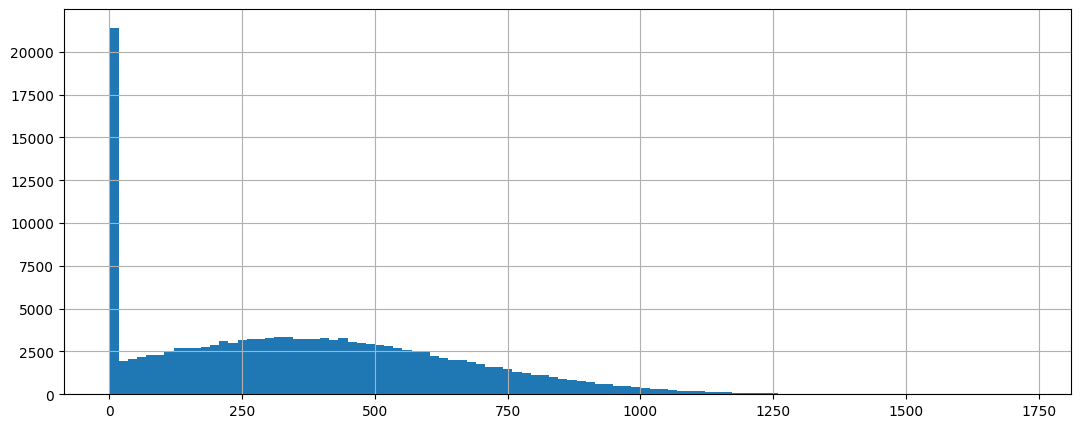

In [9]:
sessions['mb_used'].hist(bins=100, figsize=FIG_SIZE)

Чтение файла `/datasets/messages.csv`, сохранение датафрейм в переменной `messages`.

In [10]:
messages = pd.read_csv('datasets/messages.csv')

Вывод первые 5 строк датафрейма `messages`.

In [11]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Вывод основной информации для датафрейма `messages`. 

In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Чтение файла `/datasets/tariffs.csv`, сохранение датафрейм в переменной `tariffs`.

In [13]:
tariffs = pd.read_csv('datasets/tariffs.csv')

Вывод всего датафрейма `tariffs`.

In [14]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Вывод основной информацию для датафрейма `tariffs`.

In [15]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 260.0+ bytes


Чтения файла `/datasets/users.csv`, сохранение датафрейма в переменнаой `users`.

In [16]:
users = pd.read_csv('datasets/users.csv')

Вывод первых 5 строк датафрейма `users`.

In [17]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Вывод основной информации для датафрейма `users`.

In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


<a id='section_2'></a>
## Предобработка данных

Изменение типа данных к новому типу с помощью метода `to_datetime()`, для следующих столбцов:

- `reg_date` из таблицы `users`
- `churn_date` из таблицы `users`
- `call_date` из таблицы `calls`
- `message_date` из таблицы `messages`
- `session_date` из таблицы `sessions`

In [19]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d') 

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d') 
sessions['session_date'] = pd.to_datetime(sessions['session_date'], format='%Y-%m-%d')

В данных присутствуют звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены _пропущенные звонки_, поэтому их не нужно удалять.

Однако в столбце `duration` датафрейма `calls` значения дробные. Округлю значения столбца `duration` вверх с помощью метода `numpy.ceil()` и приведите столбец `duration` к типу `int`.

In [20]:
calls['duration'] = np.ceil(calls['duration'])      # округление столбца duration с помощью np.ceil()
calls['duration'] = calls['duration'].astype('int') # приведение типа к 'int'

Удалю столбец `Unnamed: 0` из датафрейма `sessions`. Столбец с таким названием возникает, когда данные сохраняют с указанием индекса (`df.to_csv(..., index=column)`). Он сейчас не понадобится.

In [21]:
sessions = sessions.loc[:, 'id':'user_id']

Создание столбеца `month` в датафрейме `calls` с номером месяца из столбца `call_date`.

In [22]:
calls['month'] = calls['call_date'].dt.month

Создание столбеца `month` в датафрейме `messages` с номером месяца из столбца `message_date`.

In [23]:
messages['month'] = messages['message_date'].dt.month

Создание столбеца `month` в датафрейме `sessions` с номером месяца из столбца `session_date`.

In [24]:
sessions['month'] = sessions['session_date'].dt.month

Подсчёт количества сделанных звонков разговора для каждого пользователя по месяцам.

In [25]:
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))

display(calls_per_month.head(30))

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21

Подсчёт израсходованных минут для каждого пользователя по месяцам, и сохранение в переменную `minutes_per_month`. Понадобится:

- сгруппировать датафрейм с информацией о звонках по двум столбцам — с идентификаторами пользователей и номерами месяцев;
- после группировки выбрать столбец `duration`
- затем применить метод для подсчёта суммы.

Вывод первых 30 строчек `minutes_per_month`.

In [26]:
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum')) 

display(minutes_per_month.head(30))

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130

Подсчёт количества отправленных сообщений по месяцам для каждого пользователя и сохранение в переменную `messages_per_month`. Понадобится:

- сгруппировать датафрейм с информацией о сообщениях по двум столбцам — с идентификаторами пользователей и номерами месяцев;
- после группировки выбрать столбец `message_date`;
- затем применить метод для подсчёта количества.

Выведите первые 30 строчек `messages_per_month`.

In [27]:
messages_per_month = messages.groupby(['user_id', 'month']).agg(messages = ('message_date', 'count'))

display(messages_per_month.head(30))

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38

Подсчёт количества потраченных мегабайт по месяцам для каждого пользователя и сохранение в переменную `sessions_per_month`. Понадобится:

- сгруппировать датафрейм с информацией о сообщениях по двум столбцам — с идентификаторами пользователей и номерами месяцев;
- затем применить метод для подсчёта суммы: `.agg({'mb_used': 'sum'})`

In [28]:
sessions_per_month = sessions.groupby(['user_id', 'month']).agg({'mb_used' : 'sum'})

display(sessions_per_month.head(30))

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04

<a id='section_3'></a>
## Статистический анализ данных и подсчёт выручки

Подсчёт доли (процентов) расторгнутых договоров.

In [29]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

Объединение всех посчитанныех выше значений в один датафрейм `user_behavior`.
Для каждой пары "пользователь - месяц" будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах.

In [30]:
user_behavior = calls_per_month.merge(messages_per_month, left_index=True, right_index=True, how='outer')\
                               .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
                               .merge(minutes_per_month,  left_index=True, right_index=True, how='outer')\
                               .reset_index()\
                               .merge(users, how='left', left_on='user_id', right_on='user_id')

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Таблица содержит ежемесячные записи для каждого пользователя о расходах мобильных ресурсов (кол-во звонков, минут, смс и интернет трафика), а так же личные данные пользователя: ФИО, город, дата подписания договора услуг и названия тарифа.

Проверка пропусков в таблице `user_behavior` после объединения:

In [31]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Заполнение образовавшихся пропусков в данных:

In [32]:
user_behavior['calls']    = user_behavior['calls'].fillna(0)
user_behavior['minutes']  = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used']  = user_behavior['mb_used'].fillna(0)

Переименование столбца `tariff_name` на более простое `tariff`.

In [33]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})

Присоединяем информацию о тарифах.

In [34]:
user_behavior = user_behavior.merge(tariffs, on='tariff')

Подсчёт количества минут разговора, сообщений и мегабайт, превышающих включенные в тариф.


In [35]:
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Перевод мегабайтов в гигабайты превышающих тариф и сохранение в столбец `paid_gb`.

In [36]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Подсчёт выручки за минуты разговора, сообщения и интернет.

In [37]:
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

Подсчёт помесячной выручку с каждого пользователя. Она будет храниться в столбец `total_cost`

In [38]:
user_behavior['total_cost'] = user_behavior['rub_monthly_fee']\
                            + user_behavior['cost_minutes']\
                            + user_behavior['cost_messages']\
                            + user_behavior['cost_gb']

Сохранение статистических метрик для каждой пары месяц-тариф в одной таблице stats_df (среднее значение, стандартное отклонение, медиана).
Датафрейм `stats_df` для каждой пары "месяц-тариф" будет хранить основные характеристики

In [39]:
stats_df = user_behavior.pivot_table(index=['month', 'tariff'],
                                     values=['calls', 'minutes', 'messages', 'mb_used'],
                                     aggfunc=['mean', 'std', 'median']
                                    ).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean',   'sessions_mean',   'messages_mean',   'minutes_mean',
                                     'calls_std',    'sessions_std',    'messages_std',    'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median', 'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


**Сводная таблица**: содержит статистическую оценку тарифов по месяцам. Каждая строчка - это тариф, месяц и их показатели по кол-ву звонков, минут, смс и интернет-трафика (среднее, медиана, стандартное отклонение). Период: 12 месяцев.

Распределение среднего количества звонков по видам тарифов и месяцам.

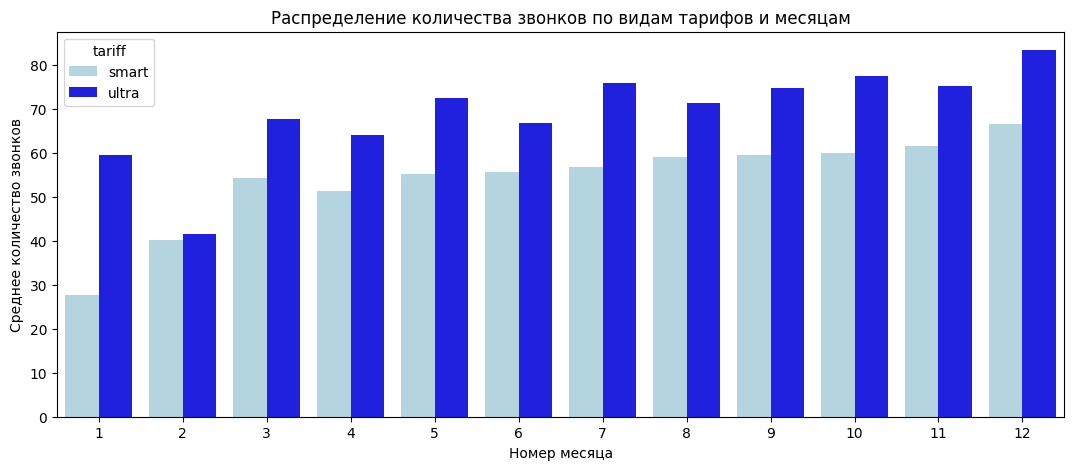

In [40]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
sns.barplot(x='month', y='calls_mean', data=stats_df, hue="tariff", palette=['lightblue', 'blue'], ax=ax)
plt.title('Распределение количества звонков по видам тарифов и месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Среднее количество звонков')
plt.show()

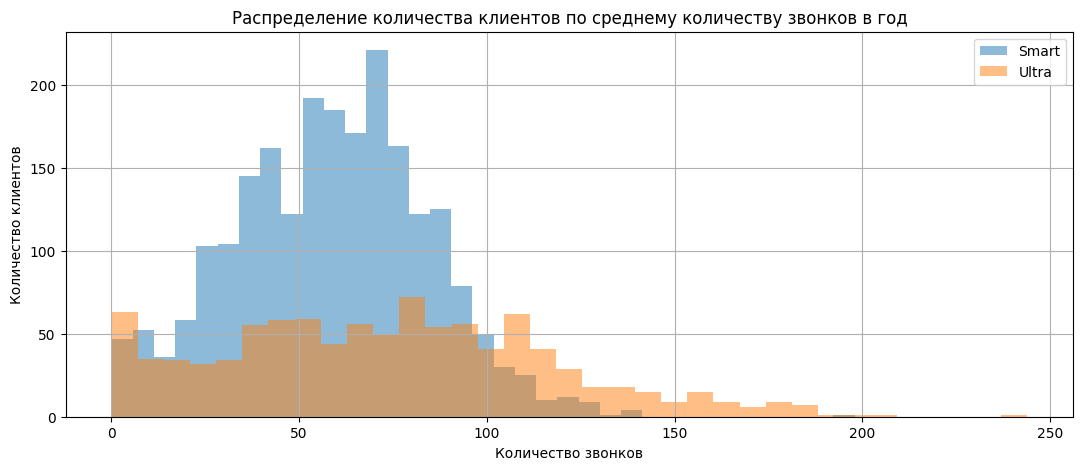

In [41]:
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5, figsize=FIG_SIZE)
plt.legend(['Smart', 'Ultra'])
plt.title('Распределение количества клиентов по среднему количеству звонков в год')
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')
plt.grid(True)
plt.show()

Распределение средней продолжительности звонков по видам тарифов и месяцам.

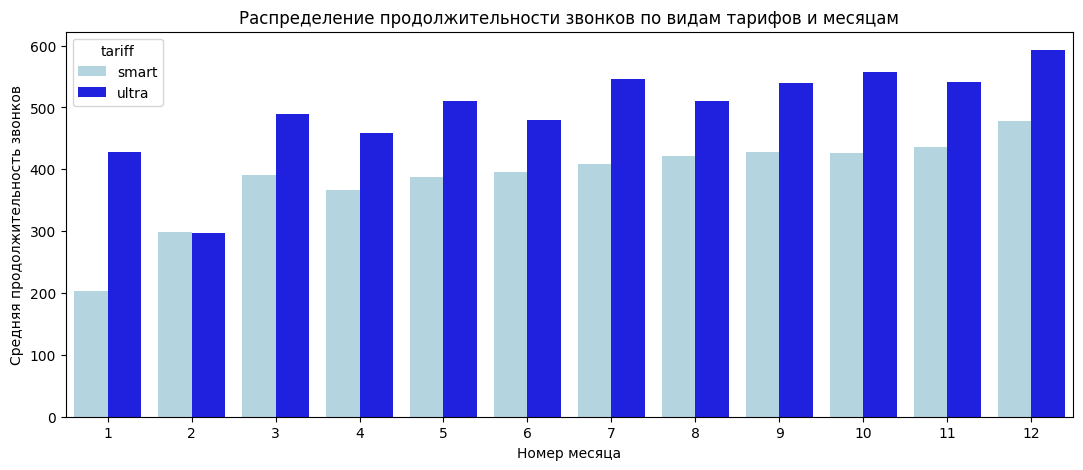

In [42]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
sns.barplot(x='month', y='minutes_mean', data=stats_df, hue="tariff", palette=['lightblue', 'blue'], ax=ax)
plt.title('Распределение продолжительности звонков по видам тарифов и месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Средняя продолжительность звонков')
plt.show()

Распределение кол-ва пользователей по длительности разговора.

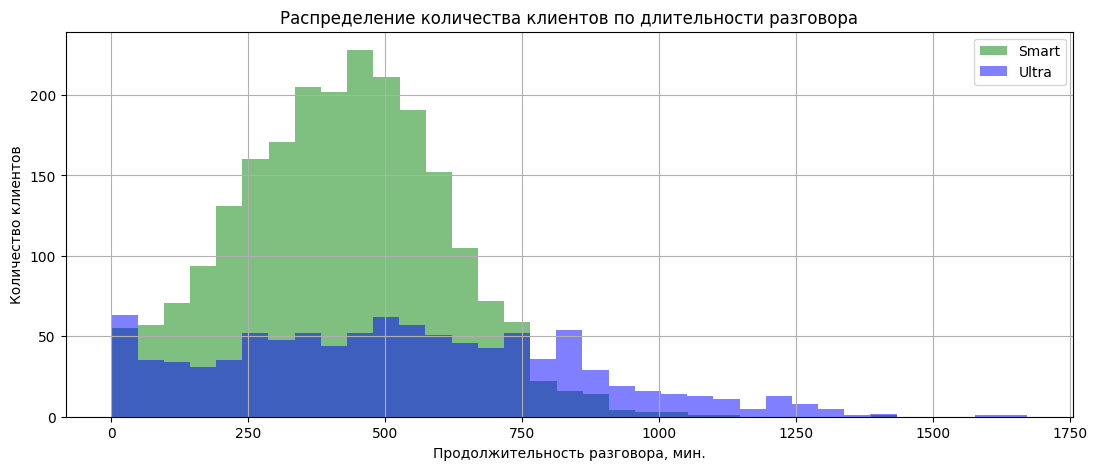

In [43]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=30, alpha=0.5, figsize=FIG_SIZE, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, figsize=FIG_SIZE, color='blue')
plt.legend(['Smart', 'Ultra'])
plt.title('Распределение количества клиентов по длительности разговора')
plt.xlabel('Продолжительность разговора, мин.')
plt.ylabel('Количество клиентов')
plt.grid(True)
plt.show()

Средняя длительность разговоров у абонентов тарифа _Ultra_ больше, чем у абонентов тарифа _Smart_. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа _Smart_ равномерный в течение года. Пользователи тарифа _Ultra_ не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

Распределение среднего количества сообщений по видам тарифов и месяцам

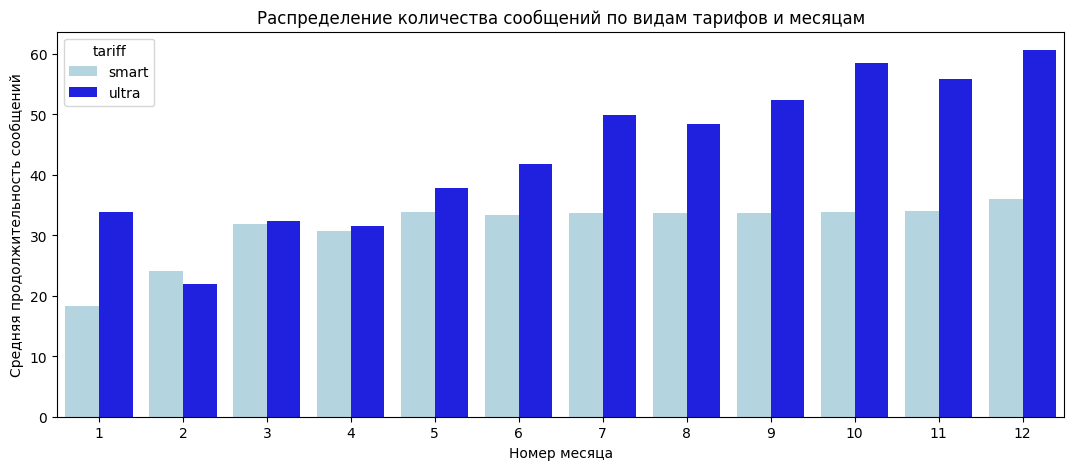

In [44]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
sns.barplot(x='month', y='messages_mean', data=stats_df, hue="tariff", palette=['lightblue', 'blue'], ax=ax)
plt.title('Распределение количества сообщений по видам тарифов и месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Средняя продолжительность сообщений')
plt.show()

Распределение кол-ва пользователей от кол-ва СМС, с учётом разных тарифов.

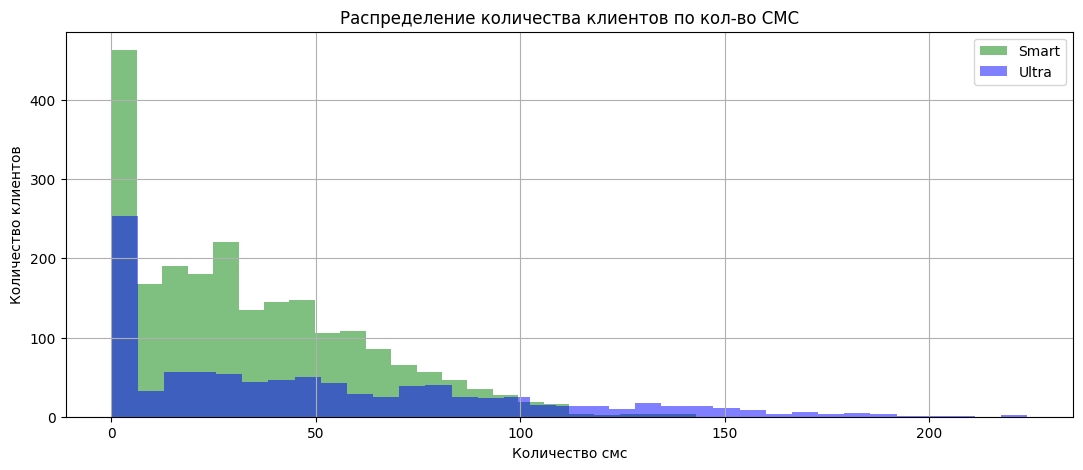

In [45]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=23, alpha=0.5, figsize=FIG_SIZE, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, figsize=FIG_SIZE, color='blue')
plt.legend(['Smart', 'Ultra'])
plt.title('Распределение количества клиентов по кол-во СМС')
plt.xlabel('Количество смс')
plt.ylabel('Количество клиентов')
plt.grid(True)
plt.show()

В среднем количество сообщений пользователи тарифа _Ultra_ отправляют больше - почти на 20 сообщений больше, чем пользователи тарифа _Smart_. Количество сообщений в течение года на обоих тарифах растет. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа _Ultra_ также проявляют нелинейную положительную динамику.

Сравнение потраченных мегабайт среди пользователей тарифов _Smart_ и _Ultra_.

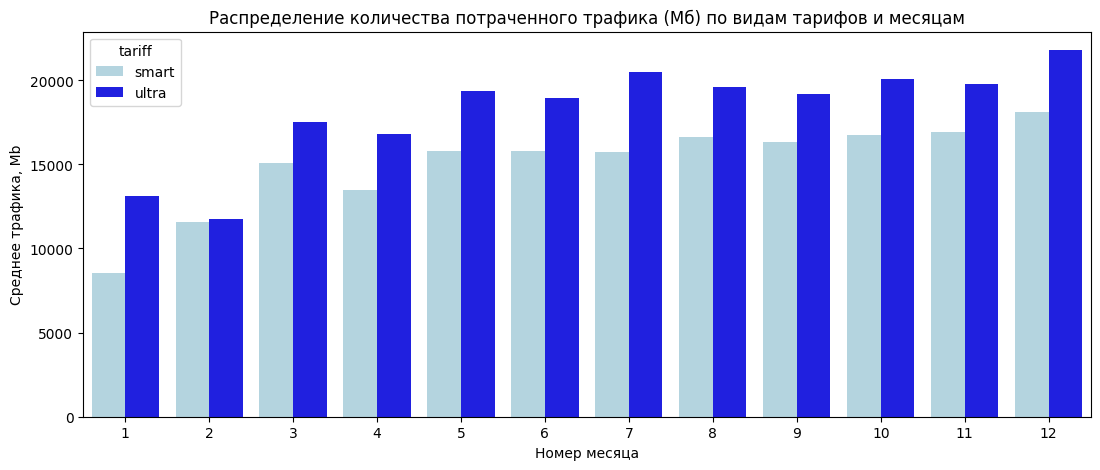

In [46]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
sns.barplot(x='month', y='sessions_mean', data=stats_df, hue="tariff", palette=['lightblue', 'blue'], ax=ax)
plt.title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Среднее трафика, Mb')
plt.show()

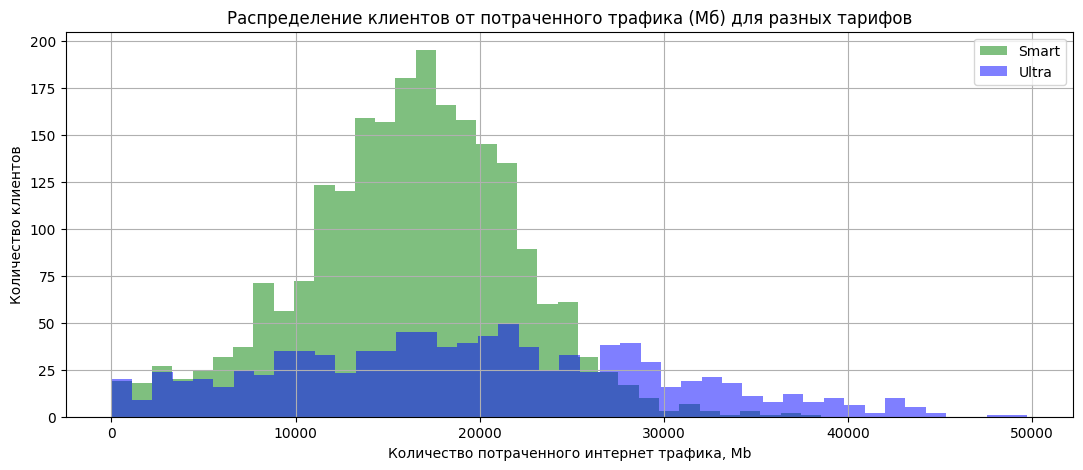

In [47]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, figsize=FIG_SIZE, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=45, alpha=0.5, figsize=FIG_SIZE, color='blue')
plt.legend(['Smart', 'Ultra'])
plt.title('Распределение клиентов от потраченного трафика (Мб) для разных тарифов')
plt.xlabel('Количество потраченного интернет трафика, Mb')
plt.ylabel('Количество клиентов')
plt.grid(True)
plt.show()

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15-17 Гб, а абоненты тарифного плана _Ultra_ - 19-21 ГБ.

<a id='section_4'></a>
## Проверка гипотез

Проверка гипотезы: средняя выручка от пользователей тарифов _«Ультра»_ и _«Смарт»_ различаются;

```
H_0: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"`
H_a: Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"`
alpha = 0.05
```

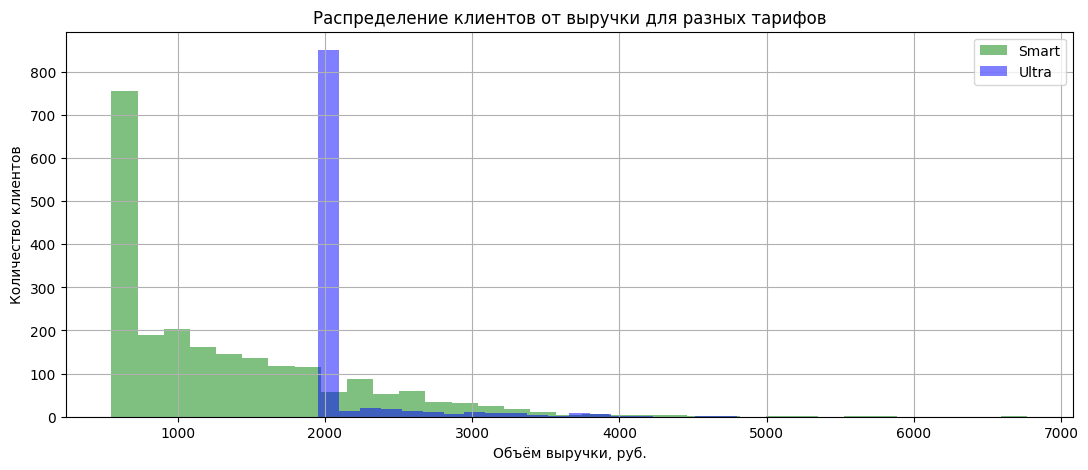

In [48]:
user_behavior[user_behavior['tariff']=='smart']['total_cost'].hist(bins=35, alpha=0.5, figsize=FIG_SIZE, color='green')
user_behavior[user_behavior['tariff']=='ultra']['total_cost'].hist(bins=20, alpha=0.5, figsize=FIG_SIZE, color='blue')
plt.legend(['Smart', 'Ultra'])
plt.title('Распределение клиентов от выручки для разных тарифов')
plt.xlabel('Объём выручки, руб.')
plt.ylabel('Количество клиентов')
plt.grid(True)
plt.show()

In [49]:
#вызов метода для проверки гипотезы
results = st.ttest_ind(user_behavior[user_behavior['tariff']=='smart']['total_cost'],
                       user_behavior[user_behavior['tariff']=='ultra']['total_cost'],
                       equal_var=False) 

alpha = 0.05 # значение уровня значимости

print(results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha: # условный оператор с выводом строки с ответом
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.2606313931076085e-250
Отвергаем нулевую гипотезу


Проверка гипотезы: пользователи из Москвы приносят больше выручки, чем пользователи из других городов;

```
H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы`
H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы`
alpha = 0.05
```

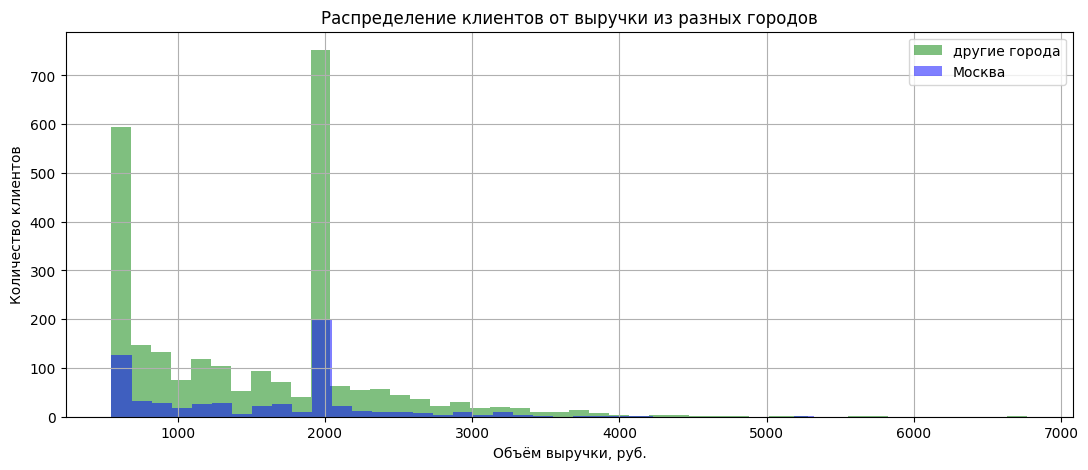

In [50]:
user_behavior[user_behavior['city']!='Москва']['total_cost'].hist(bins=46, alpha=0.5, figsize=FIG_SIZE, color='green')
user_behavior[user_behavior['city']=='Москва']['total_cost'].hist(bins=35, alpha=0.5, figsize=FIG_SIZE, color='blue')
plt.legend(['другие города', 'Москва'])
plt.title('Распределение клиентов от выручки из разных городов')
plt.xlabel('Объём выручки, руб.')
plt.ylabel('Количество клиентов')
plt.grid(True)
plt.show()

In [51]:
# вызов метода для проверки гипотезы
results = st.ttest_ind(user_behavior[user_behavior['city']=='Москва']['total_cost'],
                       user_behavior[user_behavior['city']!='Москва']['total_cost'])

alpha = 0.05 #задайте значение уровня значимости

print(results.pvalue) # вывод значения p-value на экран 

if results.pvalue < alpha: # условный оператор с выводом строки с ответом
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5440152911670223
Не получилось отвергнуть нулевую гипотезу


<a id='section_5'></a>
## Итоговый вывод

Средняя **длительность разговоров** у абонентов тарифа _Ultra_ больше, чем у абонентов тарифа _Smart_. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа _Smart_ равномерный в течение года. Пользователи тарифа _Ultra_ не проявляют подобной линейной стабильности.

В среднем **количество смс** пользователи тарифа _Ultra_ отправляют больше - почти на 20 сообщений больше, чем пользователи тарифа _Smart_. Количество сообщений в течение года на обоих тарифах растет. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа _Ultra_ также проявляют нелинейную положительную динамику.

Меньше всего пользователи использовали **интернет** в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15-17 Гб, а абоненты тарифного плана _Ultra_ - 19-21 ГБ.

По результату проверки поставленных гипотиз получается, что:
- Общая выручка пользователей _"Ультра"_ **не равна** общей выручке пользователей _"Смарт"_
- Общая выручка пользователей из Москвы **сопоставима** общей выручке пользователей за пределами Москвы.